In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from prettytable import PrettyTable

In [4]:
df = pd.read_csv('/content/drive/MyDrive/data set codsoft/IRIS.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
class_counts = df['species'].value_counts()
print("Class Counts:")
print(class_counts)

Class Counts:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


In [7]:
duplicates_df = df[df.duplicated()]

if not duplicates_df.empty:
    print("Duplicates found in the dataset:")
    print(duplicates_df)
else:
    print("No duplicates found in the dataset.")

Duplicates found in the dataset:
     sepal_length  sepal_width  petal_length  petal_width         species
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
142           5.8          2.7           5.1          1.9  Iris-virginica


In [8]:
df = df.drop_duplicates()

In [9]:
duplicates_df = df[df.duplicated()]

if not duplicates_df.empty:
    print("Duplicates found in the dataset:")
    print(duplicates_df)
else:
    print("No duplicates found in the dataset.")

No duplicates found in the dataset.


In [10]:
null_counts = df.isnull().sum()

if null_counts.any():
    print("Dataset has null values.")
    print("Columns with null values:")
    print(null_counts[null_counts > 0])
else:
    print("Dataset has no null values.")

Dataset has no null values.


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
sepal_width,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
petal_length,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
petal_width,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


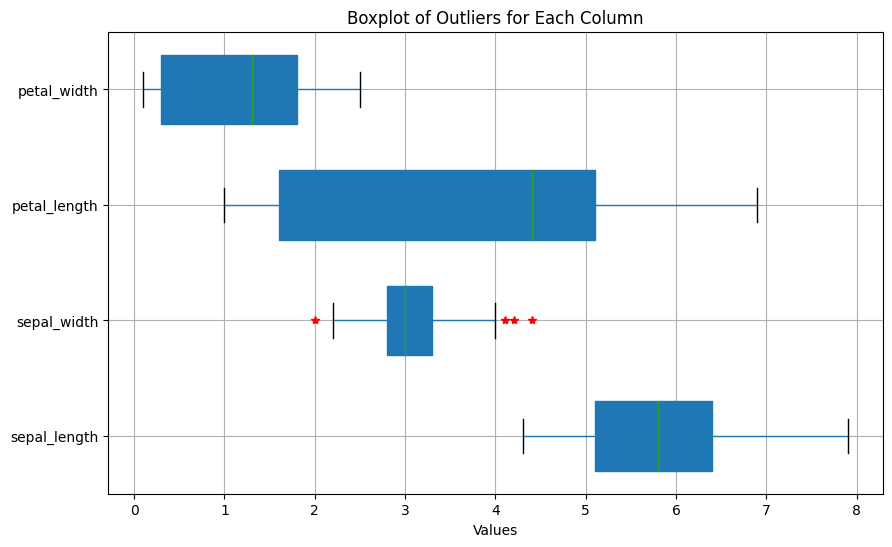

In [12]:
input_columns = df.columns[:-1].tolist()# Create a boxplot for each column excluding the last one
plt.figure(figsize=(10, 6))
df[input_columns].boxplot(sym='r*', vert=False, patch_artist=True, widths=0.6)
plt.title('Boxplot of Outliers for Each Column')
plt.xlabel('Values')
plt.show()

In [13]:
input_columns = df.columns[:-1].tolist()
def replace_outliers_with_median(column):
    median = column.median()
    lower_limit = column.quantile(0.25) - 1.5 * (column.quantile(0.75) - column.quantile(0.25))
    upper_limit = column.quantile(0.75) + 1.5 * (column.quantile(0.75) - column.quantile(0.25))

    # Replace values outside the upper and lower limits with the median
    column = column.apply(lambda x: median if x < lower_limit or x > upper_limit else x)
    return column

# Apply the function to each column in the DataFrame
for column in input_columns:
    df[column] = replace_outliers_with_median(df[column])

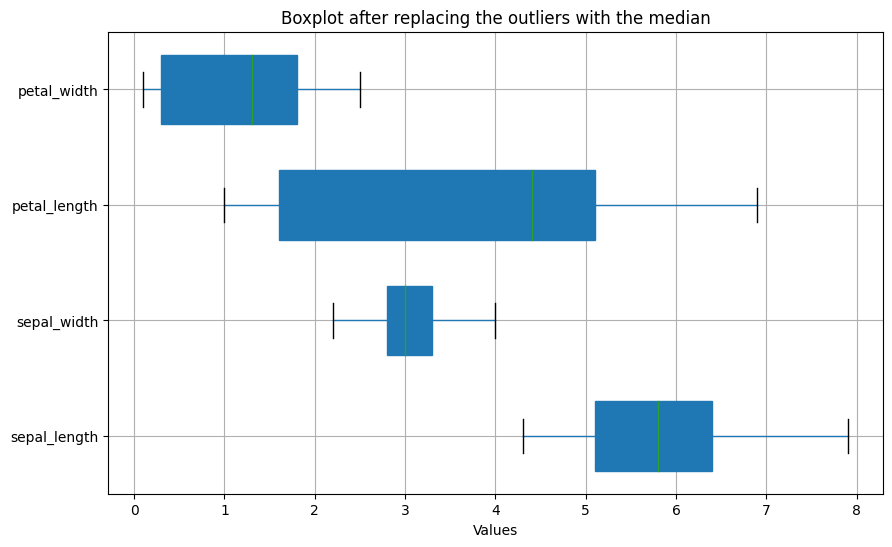

In [14]:
input_columns = df.columns[:-1].tolist()
plt.figure(figsize=(10, 6))
df[input_columns].boxplot(sym='r*', vert=False, patch_artist=True, widths=0.6)
plt.title('Boxplot after replacing the outliers with the median')
plt.xlabel('Values')
plt.show()

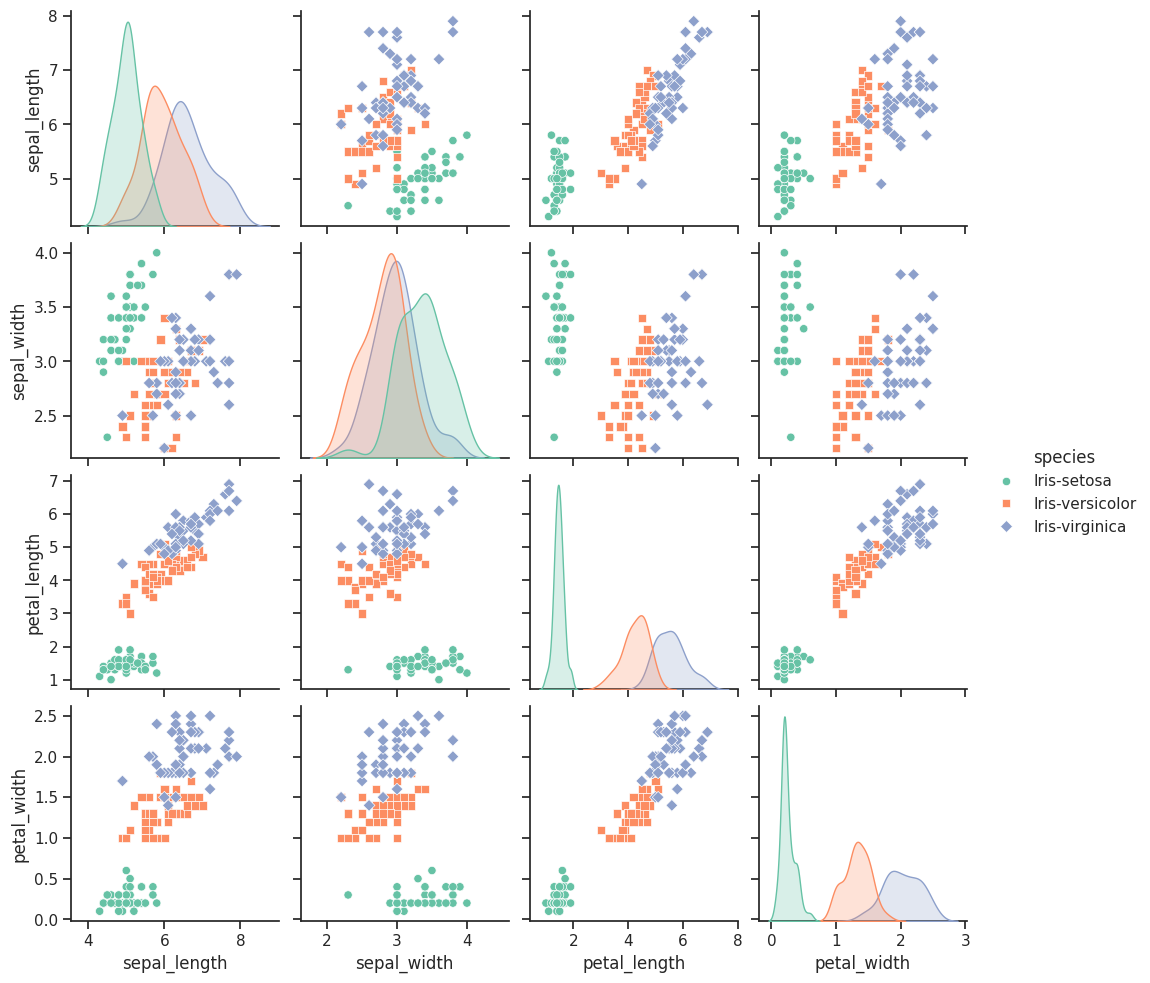

In [15]:
sns.set(style="ticks")
custom_palette = sns.color_palette("Set2")[:3]
sns.pairplot(df, hue='species', markers=['o', 's', 'D'], palette=custom_palette)
plt.show()

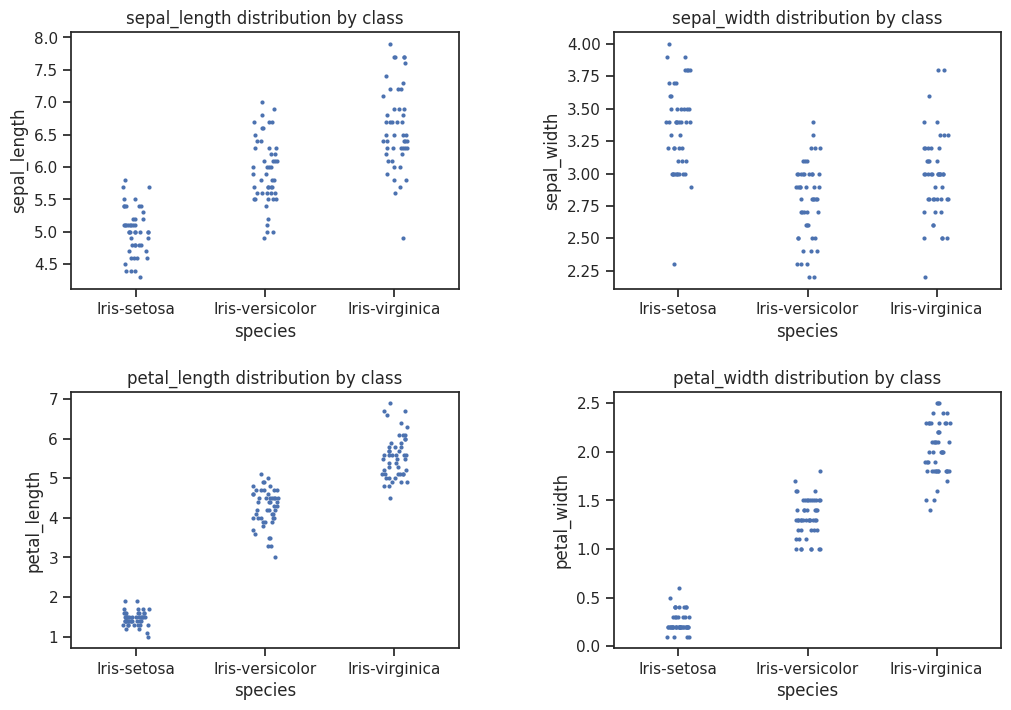

In [16]:
plt.figure(figsize=(12, 8))

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.stripplot(x='species', y=column, data=df, size=3, jitter=True)
    plt.title(f'{column} distribution by class')
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

In [17]:
df['species'] = df['species'].map({'Iris-versicolor': 0, 'Iris-virginica': 1, 'Iris-setosa': 2})

In [18]:
X = df.drop(['species'], axis=1)
y = df['species']

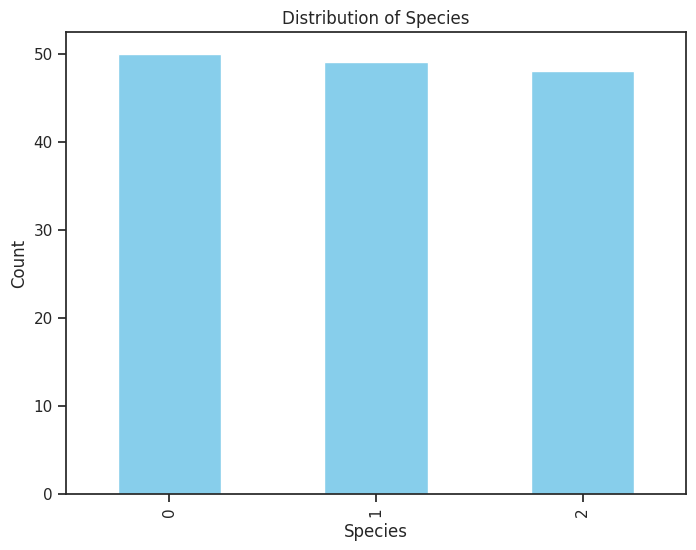

In [19]:
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print shapes of X_train, y_train, X_test, y_test
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (102, 4)
y_train shape: (102,)
X_test shape: (45, 4)
y_test shape: (45,)


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
nn_model = MLPClassifier(max_iter=500, random_state=42)

In [23]:
nn_model.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [24]:
nn_train_predictions = nn_model.predict(X_train_scaled)
nn_train_accuracy = accuracy_score(y_train, nn_train_predictions)

In [25]:
nn_test_predictions = nn_model.predict(X_test_scaled)
nn_test_accuracy = accuracy_score(y_test, nn_test_predictions)

In [26]:
nn_cv_accuracy = cross_val_score(nn_model, X_train_scaled, y_train, cv=5).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
result_table = PrettyTable()
result_table.field_names = ["Model", "Training Accuracy", "Testing Accuracy", "Cross-Validation Accuracy"]
# Bold MLP result in the table
result_table.add_row(["\033[1mMultilayer Perceptron\033[0m", f"\033[1m{nn_train_accuracy:.4f}\033[0m", f"\033[1m{nn_test_accuracy:.4f}\033[0m", f"\033[1m{nn_cv_accuracy:.4f}\033[0m"])

# Print the table
print(result_table)

+-----------------------+-------------------+------------------+---------------------------+
|         Model         | Training Accuracy | Testing Accuracy | Cross-Validation Accuracy |
+-----------------------+-------------------+------------------+---------------------------+
| Multilayer Perceptron |       0.9804      |      0.9778      |           0.9419          |
+-----------------------+-------------------+------------------+---------------------------+


In [ ]:
nn_confusion_matrix = confusion_matrix(y_test, nn_test_predictions)

# Print the confusion matrix
print("Confusion Matrix for Multilayer Perceptron:")
print(nn_confusion_matrix)

Confusion Matrix for Multilayer Perceptron:
[[11  1  0]
 [ 0 16  0]
 [ 0  0 17]]


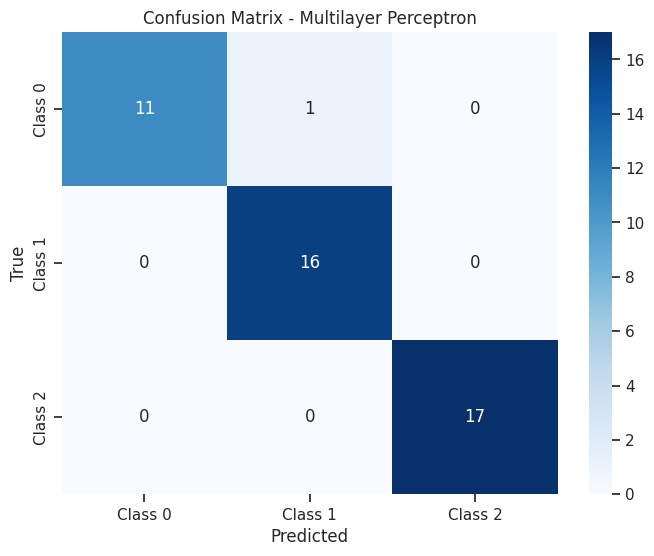

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(nn_confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix - Multilayer Perceptron')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()